In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from math import sqrt
from sklearn import neighbors,preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

Data Preprocessing

In [20]:
# #表格化resd_csv
# train_data=pd.read_csv('./adult/adult.data',header=0,names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'])
# test_data=pd.read_csv('./adult/adult.test',header=0,names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'])
# #?換成NAN
# train_data=train_data.replace(' ?',np.nan)
# test_data=test_data.replace(' ?',np.nan)
# #找'workclass','occupation','native-country'各自的眾數，NaN替換成眾數
# train_data['workclass']=train_data['workclass'].fillna((train_data['workclass'].mode()[0]))
# train_data['occupation']=train_data['occupation'].fillna((train_data['occupation'].mode()[0]))
# train_data['native-country']=train_data['native-country'].fillna((train_data['native-country'].mode()[0]))
# test_data['workclass']=test_data['workclass'].fillna((test_data['workclass'].mode()[0]))
# test_data['occupation']=test_data['occupation'].fillna((test_data['occupation'].mode()[0]))
# test_data['native-country']=test_data['native-country'].fillna((test_data['native-country'].mode()[0]))
# #去除class裡的.跟空白鍵
# train_data=train_data.apply(lambda x: x.replace(' ', ''))
# test_data=test_data.apply(lambda x: x.replace(' ', ''))
# test_data['class'] = test_data['class'].apply(lambda x: x.replace('>50K.','>50K'))
# test_data['class'] = test_data['class'].apply(lambda x: x.replace('<=50K.','<=50K'))
# labelencoder = LabelEncoder()
# labelencoder.fit_transform(test_data['class'])
# #刪除意思相近的欄位
# train_data=train_data.drop(labels=['education-num'],axis='columns')
# test_data=test_data.drop(labels=['education-num'],axis='columns')
# #刪除較無意義的欄位
# train_data=train_data.drop(labels=['fnlwgt'],axis='columns')
# test_data=test_data.drop(labels=['fnlwgt'],axis='columns')
# # #刪掉重複的資料
# train_data=train_data.drop_duplicates() 
# test_data=test_data.drop_duplicates() 
# #one hot encoding
# train_data=pd.get_dummies(train_data,columns=['workclass','education','marital-status','occupation','relationship','race','sex','native-country','class'],dtype=int)
# test_data=pd.get_dummies(test_data,columns=['workclass','education','marital-status','occupation','relationship','race','sex','native-country','class'],dtype=int)
# #test_data的feature缺少了'native-country_ Holand-Netherlands'這個欄位，將此欄位補上後，值填0，_並用get_loc找出位置排序好
# test_data.insert(loc=76,column='native-country_ Holand-Netherlands',value=0)
# #StandardScaler
# # scaler = StandardScaler() 
# # train_data = scaler.fit_transform(train_data) 
# train_data['age'] = (train_data['age']-train_data['age'].mean())/train_data['age'].std()
# train_data['capital-gain'] = (train_data['capital-gain']-train_data['capital-gain'].mean())/train_data['capital-gain'].std()
# train_data['capital-loss'] = (train_data['capital-loss']-train_data['capital-loss'].mean())/train_data['capital-loss'].std()
# train_data['hours-per-week'] = (train_data['hours-per-week']-train_data['hours-per-week'].mean())/train_data['hours-per-week'].std()

# test_data['age'] = (test_data['age']-test_data['age'].mean())/test_data['age'].std()
# test_data['capital-gain'] = (test_data['capital-gain']-test_data['capital-gain'].mean())/test_data['capital-gain'].std()
# test_data['capital-loss'] = (test_data['capital-loss']-test_data['capital-loss'].mean())/test_data['capital-loss'].std()
# test_data['hours-per-week'] = (test_data['hours-per-week']-test_data['hours-per-week'].mean())/test_data['hours-per-week'].std()
# train_data


In [21]:
# read dataframe
train_data = pd.read_csv('./adult/adult.data', header= None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
test_data = pd.read_csv('./adult/adult.test', header= None, skiprows=1, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
originTest = test_data

print("Original data: Train", train_data.shape, ", Test", test_data.shape)

# drop duplicate value
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

print("After Dropping: Train", train_data.shape, ", Test", test_data.shape)
# education and education-num have same meaning
train_data.drop(['education'], axis = 1, inplace = True)
test_data.drop(['education'], axis = 1, inplace = True)

# fnlwgt is not important feature
train_data.drop(['fnlwgt'], axis = 1, inplace = True)
test_data.drop(['fnlwgt'], axis = 1, inplace = True)

# remove the space
train_data = train_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
test_data = test_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# replace the NAN into mode value
train_data['workclass'] = train_data['workclass'].replace("?", train_data['workclass'].mode()[0])
train_data['occupation'] = train_data['occupation'].replace("?",train_data['occupation'].mode()[0])
train_data['native-country'] = train_data['native-country'].replace("?",train_data['native-country'].mode()[0])


test_data['workclass'] = test_data['workclass'].replace("?", test_data['workclass'].mode()[0])
test_data['occupation'] = test_data['occupation'].replace("?",test_data['occupation'].mode()[0])
test_data['native-country'] = test_data['native-country'].replace("?",test_data['native-country'].mode()[0])

# Label Encoding
# tranfer the value of class(income) into int(1 or 0)
# >50K is 1, <=50K is 0
train_data['income'] = train_data['income'].apply(lambda x: 1 if x == ">50K" else 0)
test_data['income'] = test_data['income'].apply(lambda x: 1 if x == ">50K" else 0)

# One Hot Encoding (Dummies)
trainData_dum = pd.get_dummies(train_data, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], dtype=int)
testData_dum = pd.get_dummies(test_data, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], dtype=int)
pd.DataFrame(trainData_dum)

#在讀熱編碼後會依照有名目之欄位產生資料，train_data比test_data多出了該欄位，故將test_data新增該欄位，讓兩個資料集欄位相同。
testData_dum['native-country_Holand-Netherlands'] = 0
# test_data.insert(loc=76,column='native-country_ Holand-Netherlands',value=0)

# Normalization(z-score)
numerical_columns = ['age','education-num','capital-gain','capital-loss']
scaler = preprocessing.StandardScaler()
trainData_dum[numerical_columns] = scaler.fit_transform(trainData_dum[numerical_columns])
testData_dum[numerical_columns] = scaler.transform(testData_dum[numerical_columns])


## replace "&" into "and" (for graph)
trainData_dum = trainData_dum.rename(columns={'native-country_Trinadad&Tobago': 'native-country_Trinadad_and_Tobago'})
testData_dum = testData_dum.rename(columns={'native-country_Trinadad&Tobago': 'native-country_Trinadad_and_Tobago'})


Original data: Train (32561, 15) , Test (16281, 15)
After Dropping: Train (32537, 15) , Test (16276, 15)


RandomForestClassifier

In [22]:
#建立模型
train_X, test_X, train_y, test_y = trainData_dum.drop(columns=['hours-per-week'],axis=1), testData_dum.drop(columns=['hours-per-week'],axis=1), trainData_dum['hours-per-week'], testData_dum['hours-per-week']
# regr = RandomForestRegressor(max_depth=2, random_state=0)
# regr.fit(train_X, train_y)
# pred_y=regr.predict(test_X)

RandomForestRegressor 績效(MSE，RMSE，MAE、R-Squared)

In [27]:
train_data_score=[]
R2=[]
RMSE=[]
MAPE=[]
i_array=[]
for i in range(10,40):
    print('i=',i)
    i_array.append(i)
    startT = time.time()
    regr = RandomForestRegressor(min_samples_split=25,max_depth=i,max_features='sqrt',n_jobs=-1)
    regr.fit(train_X, train_y)
    endT = time.time()
    pred_y=regr.predict(test_X)
    train_data_score.append(regr.score(train_X, train_y))
    R2.append(r2_score(test_y, pred_y))
    RMSE.append(np.sqrt(mean_squared_error(test_y,pred_y)))
    MAPE.append(mean_absolute_percentage_error(test_y,pred_y))
    print("train_data score:",regr.score(train_X, train_y))
    print("R2:", r2_score(test_y, pred_y))
    print("RMSE:", np.sqrt(mean_squared_error(test_y,pred_y)))
    print("MAPE:", mean_absolute_percentage_error(test_y,pred_y))
    print('執行時間:', endT-startT)
    print('------------------------------------------------------')


i= 10


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.26537326363828284
R2: 0.22454833771855165
RMSE: 10.9885504982513
MAPE: 0.31593546432548736
執行時間: 1.1406564712524414
------------------------------------------------------
i= 11


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.27651230131124516
R2: 0.22981542118159393
RMSE: 10.951168266165462
MAPE: 0.31590227167996826
執行時間: 0.8487184047698975
------------------------------------------------------
i= 12


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.2878314157785212
R2: 0.23221227659692478
RMSE: 10.934114678556247
MAPE: 0.3131329740199188
執行時間: 1.089820384979248
------------------------------------------------------
i= 13


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.30328224351450495
R2: 0.23939482529432354
RMSE: 10.88285093501241
MAPE: 0.3112961449759912
執行時間: 1.068284273147583
------------------------------------------------------
i= 14


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.3141200586171613
R2: 0.24372386600172335
RMSE: 10.851836465532468
MAPE: 0.31005501435973426
執行時間: 1.19960618019104
------------------------------------------------------
i= 15


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.32541290802991607
R2: 0.24374130455696796
RMSE: 10.851711351548229
MAPE: 0.3090911332307803
執行時間: 1.6037111282348633
------------------------------------------------------
i= 16


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.3382564659470695
R2: 0.2464689802408031
RMSE: 10.832123684064722
MAPE: 0.3066812605391729
執行時間: 1.1667687892913818
------------------------------------------------------
i= 17


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.34454030114072254
R2: 0.2437009907892187
RMSE: 10.852000582960587
MAPE: 0.3070577318506081
執行時間: 1.2642385959625244
------------------------------------------------------
i= 18


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.3531809715085691
R2: 0.24558532565180002
RMSE: 10.838473158075878
MAPE: 0.30736065849069943
執行時間: 1.4045085906982422
------------------------------------------------------
i= 19


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.36240255148789424
R2: 0.2427159647529893
RMSE: 10.859065265495754
MAPE: 0.3063886078624926
執行時間: 1.4780604839324951
------------------------------------------------------
i= 20


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.3718174076721784
R2: 0.2429809167740381
RMSE: 10.857165461158553
MAPE: 0.3052857518671197
執行時間: 1.578115463256836
------------------------------------------------------
i= 21


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.3801389220983463
R2: 0.24812302228746375
RMSE: 10.82022859915934
MAPE: 0.30476516044344704
執行時間: 1.6889760494232178
------------------------------------------------------
i= 22


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.38713151599743645
R2: 0.24656809384430423
RMSE: 10.831411274031382
MAPE: 0.30553000037955
執行時間: 1.516005277633667
------------------------------------------------------
i= 23


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.39228125268014125
R2: 0.2479781223331443
RMSE: 10.821271173373857
MAPE: 0.30485891299387446
執行時間: 1.4812991619110107
------------------------------------------------------
i= 24


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.3985199736040975
R2: 0.24757331558280093
RMSE: 10.82418327899714
MAPE: 0.3050154100193864
執行時間: 1.5210657119750977
------------------------------------------------------
i= 25


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.40518845791357383
R2: 0.2481479618928485
RMSE: 10.820049145287758
MAPE: 0.3058780013985816
執行時間: 1.5157182216644287
------------------------------------------------------
i= 26


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.41014383398182264
R2: 0.24971800125581045
RMSE: 10.80874587008431
MAPE: 0.30362044365404367
執行時間: 1.67311429977417
------------------------------------------------------
i= 27


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.4150992653372171
R2: 0.24444003727302377
RMSE: 10.846697063434501
MAPE: 0.3059338246416942
執行時間: 1.5900025367736816
------------------------------------------------------
i= 28


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.41731035223971646
R2: 0.24916668946443044
RMSE: 10.812716307056544
MAPE: 0.3047078561873101
執行時間: 1.6077425479888916
------------------------------------------------------
i= 29


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.4215179573037007
R2: 0.24507055272854905
RMSE: 10.842170329711841
MAPE: 0.30394799557482644
執行時間: 1.6228604316711426
------------------------------------------------------
i= 30


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.4243927126203808
R2: 0.24361795513264517
RMSE: 10.852596298577312
MAPE: 0.30438110398073104
執行時間: 1.6599531173706055
------------------------------------------------------
i= 31


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.4272050136282921
R2: 0.24315471444737002
RMSE: 10.855919086758854
MAPE: 0.3048568454077191
執行時間: 1.7145354747772217
------------------------------------------------------
i= 32


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.42990045703127977
R2: 0.246889720595721
RMSE: 10.829099158330093
MAPE: 0.3056310220633212
執行時間: 1.6217339038848877
------------------------------------------------------
i= 33


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.4314766396665637
R2: 0.24814382906235033
RMSE: 10.820078883431288
MAPE: 0.3054043133367635
執行時間: 1.737210988998413
------------------------------------------------------
i= 34


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.4327103037499941
R2: 0.2473974378664312
RMSE: 10.825448266962747
MAPE: 0.3045958068337365
執行時間: 1.669283151626587
------------------------------------------------------
i= 35


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.4350679866642352
R2: 0.24038171405389708
RMSE: 10.875788368432449
MAPE: 0.3048670168979794
執行時間: 1.7640788555145264
------------------------------------------------------
i= 36


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.43562941376901587
R2: 0.24021922610535595
RMSE: 10.876951511869162
MAPE: 0.3044624687785441
執行時間: 1.7486295700073242
------------------------------------------------------
i= 37


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.4367014148879007
R2: 0.24731407108137915
RMSE: 10.826047824998588
MAPE: 0.3046475743380314
執行時間: 1.761399507522583
------------------------------------------------------
i= 38


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.4372597313929871
R2: 0.24140632815201257
RMSE: 10.868450968473274
MAPE: 0.30355630661498023
執行時間: 1.8362956047058105
------------------------------------------------------
i= 39


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.43835827495101654
R2: 0.2436554295697283
RMSE: 10.85232745297381
MAPE: 0.30650639097274857
執行時間: 1.8410913944244385
------------------------------------------------------
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


Top value:0.25272, Bottom value:0.22492


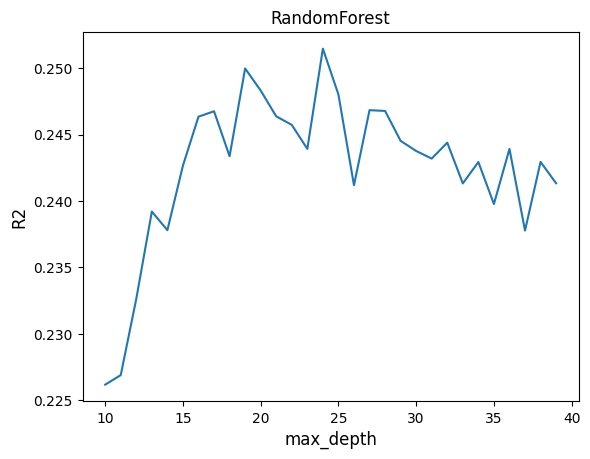

Top value:10.98602, Bottom value:10.78715


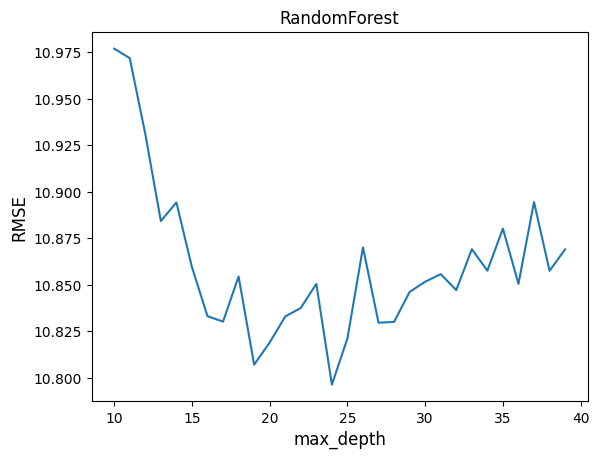

Top value:0.31589, Bottom value:0.30266


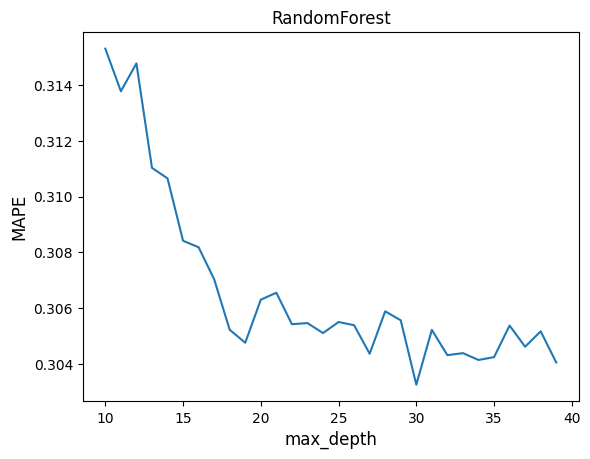

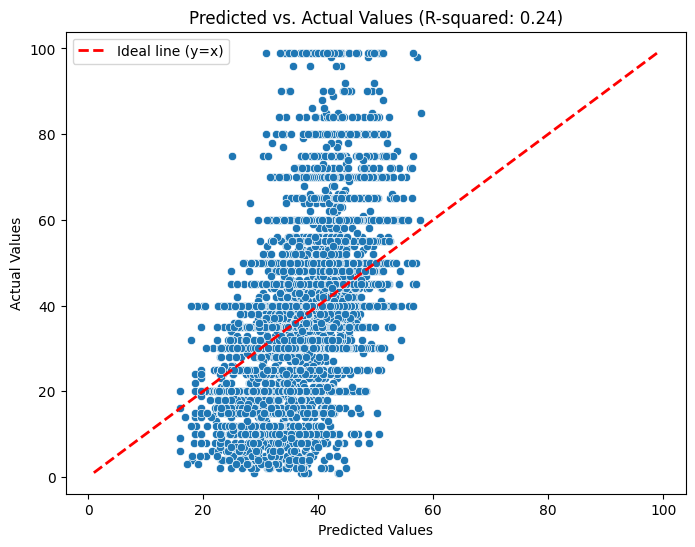

In [24]:
# plt.plot(i_array,train_data_score)
# bottom,top= plt.ylim()
# print(f"Top value:{top:.3f}, Bottom value:{bottom:.3f}")
# plt.xlabel('max_depth',fontsize=12)
# plt.ylabel('train_data_score',fontsize=12)
# plt.title('RandomForest')
# plt.show()

plt.plot(i_array,R2)
bottom,top= plt.ylim()
print(f"Top value:{top:.5f}, Bottom value:{bottom:.5f}")
plt.xlabel('max_depth',fontsize=12)
plt.ylabel('R2',fontsize=12)
plt.title('RandomForest')
plt.show()

plt.plot(i_array,RMSE)
bottom,top= plt.ylim()
print(f"Top value:{top:.5f}, Bottom value:{bottom:.5f}")
plt.xlabel('max_depth',fontsize=12)
plt.ylabel('RMSE',fontsize=12)
plt.title('RandomForest')
plt.show()

plt.plot(i_array,MAPE)
bottom,top= plt.ylim()
print(f"Top value:{top:.5f}, Bottom value:{bottom:.5f}")
plt.xlabel('max_depth',fontsize=12)
plt.ylabel('MAPE',fontsize=12)
plt.title('RandomForest')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pred_y, y=test_y)
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], linestyle='--', color='red', linewidth=2, label='Ideal line (y=x)')
plt.title(f'Predicted vs. Actual Values (R-squared: {r2_score(test_y,pred_y):.2f})')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()
plt.show()

In [25]:

for i in range(10,40):
    regr = RandomForestRegressor(min_samples_split=60,max_depth=i,max_features='sqrt',n_jobs=-1)
    regr.fit(train_X, train_y)
    pred_y=regr.predict(test_X)
    print("train_data score:",regr.score(train_X, train_y))
    print("R2:", r2_score(test_y, pred_y))
    print("RMSE:", np.sqrt(mean_absolute_error(test_y,pred_y)))
    print("MAPE:", mean_absolute_percentage_error(test_y,pred_y))
    # print('------------------------------------------------------')


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.26049870736183267
R2: 0.22640476007205934
RMSE: 2.711531194190218
MAPE: 0.316868394686649


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.27228993392550715
R2: 0.23093501476641798
RMSE: 2.707645373605011
MAPE: 0.3146312641094704


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.2838711932276222
R2: 0.23686105820936332
RMSE: 2.7009069931850855
MAPE: 0.3122322384481758


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.28802163466048525
R2: 0.23254008023318717
RMSE: 2.6997113547918343
MAPE: 0.31187494523137


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.29889094850782083
R2: 0.23600905821106966
RMSE: 2.694612588244265
MAPE: 0.3102473732918581


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.30582891764321596
R2: 0.24047420561234933
RMSE: 2.695992696034533
MAPE: 0.3105372413098295


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.3130775946842357
R2: 0.24400257175375983
RMSE: 2.6994650692350137
MAPE: 0.30873206297948935


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.3204527948584339
R2: 0.24157217772454243
RMSE: 2.6960834211923395
MAPE: 0.3090085052861699


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.3280067452605542
R2: 0.24812667626108853
RMSE: 2.696165063125874
MAPE: 0.3079206270538834


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.33170648280712833
R2: 0.24313270952652466
RMSE: 2.698935606136766
MAPE: 0.30912166808821845


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.33742126293155694
R2: 0.24005832253260329
RMSE: 2.7018673544064886
MAPE: 0.30748707901356864


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.34034976477573065
R2: 0.2427228321136632
RMSE: 2.6900984559987977
MAPE: 0.3065400445504013


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.34507278918004747
R2: 0.24495197931951307
RMSE: 2.6950007198685215
MAPE: 0.3067477573857656


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.3496292999443067
R2: 0.24377320479859732
RMSE: 2.700954308887956
MAPE: 0.30762725343875175


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.35133825720012724
R2: 0.2453358087808124
RMSE: 2.696309951238619
MAPE: 0.3062671094761179


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.35542373578103215
R2: 0.24531313562917523
RMSE: 2.6934106834776044
MAPE: 0.3054179411597232


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.3580797636974763
R2: 0.24124945756085336
RMSE: 2.7026633629733876
MAPE: 0.30731546685021943


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.3598615232445439
R2: 0.2471330045727378
RMSE: 2.6921350769939036
MAPE: 0.30613095568166127


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.3627386354015546
R2: 0.24407885098616544
RMSE: 2.697270221753703
MAPE: 0.30746852509741684


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.36346218992674006
R2: 0.2481380324266267
RMSE: 2.696609313328582
MAPE: 0.3072402458131414


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.3648269159268861
R2: 0.24854616079298864
RMSE: 2.6908593330544592
MAPE: 0.3059228056031019


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.36519563739577887
R2: 0.24619025394724614
RMSE: 2.691402110889843
MAPE: 0.3050404473081869


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.36631446138463974
R2: 0.24755051630054337
RMSE: 2.696776044910542
MAPE: 0.30602832120779555


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.366825950573173
R2: 0.24191330462968952
RMSE: 2.703016535640917
MAPE: 0.3093643298018855


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.36783823272866634
R2: 0.24498516969459594
RMSE: 2.6962471057949045
MAPE: 0.3062098437348299


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.37039537460489924
R2: 0.24762123597239194
RMSE: 2.6943040414142185
MAPE: 0.3066095327211662


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.3692875355759797
R2: 0.24379330766389573
RMSE: 2.6999890239543176
MAPE: 0.3069026120708126


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.3691558861650933
R2: 0.24578098147855132
RMSE: 2.695607244549515
MAPE: 0.3060978949474856


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.37119964548147044
R2: 0.24419736370289813
RMSE: 2.695930848719326
MAPE: 0.30572574532442937


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


train_data score: 0.3704457693654366
R2: 0.24299431312799402
RMSE: 2.692967057166103
MAPE: 0.30547167086529725


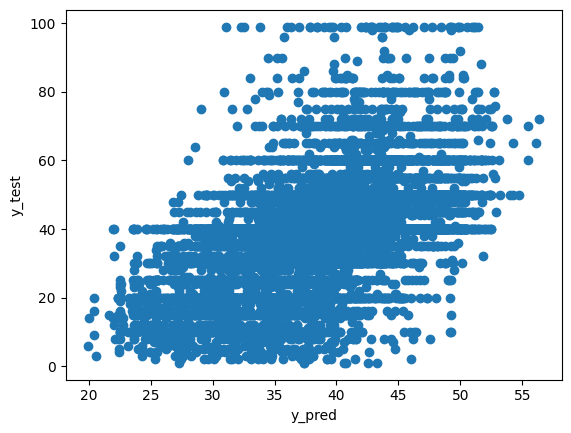

In [26]:
# plotting the y_test vs y_pred
plt.scatter(pred_y,test_y)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()